# 데이터셋 불러와줘

In [36]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np


# 데이터셋 로드
file_path = 'dataNN/1.csv' 
data = pd.read_csv(file_path)

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   년도       761 non-null    int64  
 1   국가       761 non-null    object 
 2   지역       761 non-null    object 
 3   행복 점수    761 non-null    float64
 4   1인당 GDP  761 non-null    float64
 5   가족       761 non-null    float64
 6   건강       761 non-null    float64
 7   자유       761 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 47.7+ KB
None


In [32]:
# 처음 5개 행 출력하여 데이터 살펴보기
print(data.head())

     년도           국가                               지역  행복 점수  1인당 GDP  \
0  2015  Afghanistan                    Southern Asia  3.575  0.31982   
1  2015      Albania       Central and Eastern Europe  4.959  0.87867   
2  2015      Algeria  Middle East and Northern Africa  5.605  0.93929   
3  2015       Angola               Sub-Saharan Africa  4.033  0.75778   
4  2015    Argentina      Latin America and Caribbean  6.574  1.05351   

        가족       건강       자유  
0  0.30285  0.30335  0.23414  
1  0.80434  0.81325  0.35733  
2  1.07772  0.61766  0.28579  
3  0.86040  0.16683  0.10384  
4  1.24823  0.78723  0.44974  


In [33]:
# 기초 통계량 살펴보기
print(data.describe())

                년도       행복 점수     1인당 GDP          가족          건강          자유
count   761.000000  761.000000  761.000000  761.000000  761.000000  761.000000
mean   2016.985545    5.399720    0.923125    1.081875    0.617625    0.412008
std       1.411812    1.124113    0.407512    0.331185    0.247914    0.151076
min    2015.000000    2.693000    0.000000    0.000000    0.000000    0.000000
25%    2016.000000    4.514000    0.619000    0.870701    0.454000    0.311000
50%    2017.000000    5.358000    0.989000    1.129624    0.653133    0.431000
75%    2018.000000    6.199000    1.244610    1.335000    0.809910    0.531000
max    2019.000000    7.769000    2.096000    1.644000    1.141000    0.724000


In [34]:
# 연도별 행복 점수의 평균 계산
happiness_by_year = data.groupby('년도')['행복 점수'].mean()
print(happiness_by_year)

년도
2015    5.382737
2016    5.382185
2017    5.366789
2018    5.418667
2019    5.449707
Name: 행복 점수, dtype: float64


In [35]:
# 지역별 1인당 GDP 평균 계산
gdp_per_capita_by_region = data.groupby('지역')['1인당 GDP'].mean()
print(gdp_per_capita_by_region)

지역
Australia and New Zealand          1.356197
Central and Eastern Europe         1.013598
Eastern Asia                       1.237695
Latin America and Caribbean        0.942723
Middle East and Northern Africa    1.099923
North America                      1.422037
Southeastern Asia                  0.908104
Southern Asia                      0.638813
Sub-Saharan Africa                 0.444150
Western Europe                     1.370289
Name: 1인당 GDP, dtype: float64


### 명령: 각각 순서대로 코드를 보여주고 시각화 해줘

1. 행복도와 GDP, 가족, 건강, 자유에 대한 상관분석과 잔차도분석해줘
2. 다중회귀분석해줘
4. 잔차의 합이 얼마인지 보여주고 관련해서 초등학생 수준으로 설명해줘
5. 각 요소의 계수, P-calue를 알려줘. 그리고 초등학생 수준으로 설명해줘.

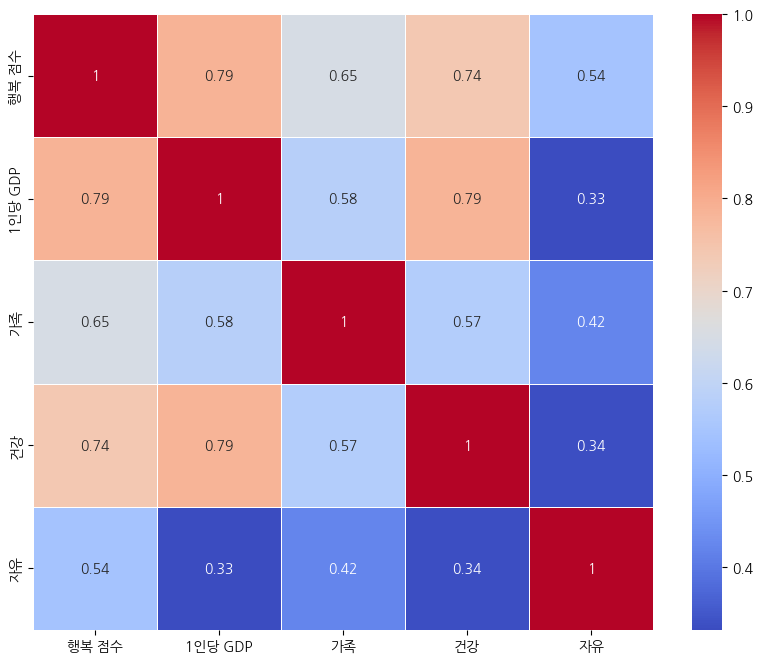

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상관관계 행렬 계산
correlation_matrix = data[['행복 점수', '1인당 GDP', '가족', '건강', '자유']].corr()

# 히트맵으로 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


In [40]:
import statsmodels.api as sm

# 독립변수와 종속변수 설정
X = data[['1인당 GDP', '가족', '건강', '자유']]
y = data['행복 점수']

# 상수항 추가
X = sm.add_constant(X)

# 다중회귀분석 모델 생성 및 학습
model = sm.OLS(y, X).fit()


In [41]:
# 잔차 계산
residuals = model.resid

# 잔차의 합 계산
sum_of_residuals = sum(residuals)

print("잔차의 합:", sum_of_residuals)


잔차의 합: 2.5628388300447114e-12


In [42]:
# 회귀분석 결과 요약 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  행복 점수   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     567.8
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          4.94e-226
Time:                        17:03:38   Log-Likelihood:                -640.44
No. Observations:                 761   AIC:                             1291.
Df Residuals:                     756   BIC:                             1314.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2915      0.077     29.726      0.0

In [43]:
# 다중회귀분석에 필요한 라이브러리를 임포트합니다.
import statsmodels.api as sm

# 독립변수(X)와 종속변수(y)를 정의합니다.
X = data[['1인당 GDP', '가족', '건강', '자유']]  # 독립변수
y = data['행복 점수']  # 종속변수

# 상수항을 독립변수에 추가합니다.
X = sm.add_constant(X)

# 다중회귀분석 모델을 생성하고 학습합니다.
model = sm.OLS(y, X).fit()

# 모델 요약 결과를 출력합니다.
model_summary = model.summary()

# 예측을 위해 새로운 데이터 포인트를 생성합니다.
new_data = pd.DataFrame({
    'const': 1,
    '1인당 GDP': [1.0],
    '가족': [1.0],
    '건강': [1.0],
    '자유': [1.0]
})

# 새로운 데이터 포인트에 대한 예측치를 생성합니다.
predictions = model.predict(new_data)

model_summary, predictions


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  행복 점수   R-squared:                       0.750
 Model:                            OLS   Adj. R-squared:                  0.749
 Method:                 Least Squares   F-statistic:                     567.8
 Date:                Sat, 06 Apr 2024   Prob (F-statistic):          4.94e-226
 Time:                        17:09:00   Log-Likelihood:                -640.44
 No. Observations:                 761   AIC:                             1291.
 Df Residuals:                     756   BIC:                             1314.
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------